In [1]:
!python --version

Python 3.7.12


In [2]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 5.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import plotly
import openpyxl
from datetime import datetime

# Importacao da lib do pandas
import pandas as pd
# Importacao da lib requests para webscraping
import requests
# Importacao da lib BeautifulSoup para facilitar a leitura dos conteudo HMT/XML
from bs4 import BeautifulSoup
#Importar numpy para exploracao de arrays
import numpy as np



 

In [4]:
 
#Define o periodo das operacoes realizadas no mercado (B3)
dt_inicio = datetime(2019,1,1)
dt_fim = datetime(2021,6,30)


# Coletando informações dos Fundos de Investimentos Imobiliários - FIIs


1.   Dataset - Lista de FIIs - fundexplorer.com.br
2.   Dataset - Informações de movimentação dos FIIs no mercado - Yahoo Finance
3.   Dataset - Informações de rendimentos dos FIIs - statusinvest.com.br


## Dataset - Lista de FIIs - fundexplorer.com.br

### Coleta e processamento dos dados do dataset - Lista de FIIs

In [8]:


# definir a url de carregamentos dos FIIs.
#site_fund = 'https://www.fundsexplorer.com.br/ranking'
 
#get na URL
#resposta_fund = requests.get(site_fund)
 
#Importacao da tabela com as informacoes dos FIIs ativos
#info_url = BeautifulSoup(resposta_fund.text,'lxml')
#tabela_fundo = info_url.find_all('table')[0]
 
#criando dataframe para armazenar as informacoes. E substituir "," -> "."
#df = pd.read_html(str(tabela_fundo),decimal=',', thousands = '.')[0]

#Fazer a cópia do arquivo https://github.com/antonioukele/tcc_puc/blob/main/data/Lista%20de%20FIIs%20-%20fundexplorer.csv
df = pd.read_csv('Lista de FIIs - fundexplorer.csv',sep=';', encoding='iso-8859-1')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df

,cod,Setor,preco_atual,liquidez_diaria,dividendo,dy,dy_3m_acumulado,DY (6M)Acumulado,dy_12m_acumulado,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,variacao_preco,rentab_periodo,rentab_acumulada,patrimonio_liq,vpa,P/VPA,dy_patrimonial,VariaçãoPatrimonial,rentab_patr_periodo,rentab_patr_acumulada,vacancia_fisica,vacancia_financeira,qtd_ativos
0,FIVN11,Shoppings,3.08,87960.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.472280e+07,6.88,0.45,0.0,0.0,0.0,0.0,56.00,0.0,1
1,BZLI11,Títulos e Val. Mob.,14.70,440410.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,0.68,1.14,4.449849e+08,11.37,1.29,0.0,0.0,0.0,0.0,0.00,0.0,0
2,XTED11,Lajes Corporativas,6.95,11390.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,1.10,-37.83,2.586245e+07,13.97,0.50,0.0,0.0,0.0,0.0,0.00,100.0,1
3,ALMI11,Lajes Corporativas,1180.02,60.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,2.291637e+08,2061.25,0.57,0.0,0.0,0.0,0.0,68.15,0.0,1
4,DOMC11,Lajes Corporativas,439.00,420.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.35,4.35,-10.00,2.694604e+08,110.26,3.98,0.0,0.0,0.0,0.0,23.44,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,BTAL11,Outros,101.34,78230.0,0.66,0.66,1.68,0.00,0.00,0.56,0.00,0.00,2.02,-0.28,0.38,-1.13,6.015818e+08,100.55,1.01,0.0,0.0,0.0,0.0,0.00,0.0,7
232,FLRP11,Shoppings,1311.88,10.0,4.40,0.34,0.98,2.37,4.09,0.33,0.39,0.34,2.37,-1.96,-1.63,1.37,1.074627e+08,1647.39,0.80,0.0,0.0,0.0,0.0,2.17,0.0,1
233,CNES11,Lajes Corporativas,40.40,1570.0,0.06,0.16,0.47,1.19,3.61,0.16,0.20,0.30,1.19,-2.40,-2.25,-21.32,2.574733e+08,87.30,0.46,0.0,0.0,0.0,0.0,55.70,0.0,1
234,AFHI11,Títulos e Val. Mob.,94.47,41660.0,0.90,0.94,0.00,0.00,0.00,0.00,0.00,0.00,1.57,0.00,0.94,1.58,1.729590e+08,96.75,0.98,0.0,0.0,0.0,0.0,0.00,0.0,0


### Transformação dos dados do dataset - Lista de FIIs

In [10]:
#Renomear os campos da tabela
df.rename(columns={'Códigodo fundo': 'cod',
                   'Setor':'setor',
                   'DividendYield': "dy", 
                   "Preço Atual": "preco_atual", 
                   "Liquidez Diária": "liquidez_diaria",
                   "DY (3M)Acumulado": "dy_3m_acumulado",
                   "Dividendo": "dividendo",
                   "DY (12M)Acumulado": "dy_12m_acumulado",
                   "DY (3M)Média": "dy_3m_media",
                   "DY (6M)Média": "dy_6m_media",
                   "DY (12M)Média": "dy_12m_media",
                   "DY Ano": "dy_ano",
                   "Variação Preço": "variacao_preco",
                   "Rentab.Período": "rentab_periodo",
                   "Rentab.Acumulada": "rentab_acumulada",
                   "PatrimônioLíq.": "patrimonio_liq",
                    "VPA": "vpa",
                   "P/VPA": "p_vpa",
                    "DYPatrimonial": "dy_patrimonial",
                    "Rentab. Patr.no Período": "rentab_patr_periodo",
                    "Rentab. Patr.Acumulada": "rentab_patr_acumulada",
                    "VacânciaFísica": "vacancia_fisica",
                    "VacânciaFinanceira": "vacancia_financeira",
                   "QuantidadeAtivos": "qtd_ativos"}, inplace= True)
 
#  - Higienização dos dados e transformação de string para float. Somente os campos str() 
for column in df.columns:
  if (type(df[column][0]) == type(str()) or  pd.isna(df[column][0]) == True) and (column not in ['cod','setor']):
    df[column] = pd.to_numeric(df[column].str.strip().str.replace('R.', '').str.replace("%","").str.replace(".",'').str.replace(',','.'))
 
df.patrimonio_liq = round(df.patrimonio_liq,2)
# Remover texto da tabela extraida da coluna p_vpa
df.query(' p_vpa != "inf"', inplace=True)

### Removendo os registros em branco/vazio

In [11]:
#Informacoes importantes do dataset
print("Dados do dataset inicial\n")
print("Qtd. colunas: " + str(len(df.columns)))
print("Qtd. linhas: " + str(len(df)))
print("Total de registros: " + str(df.count().sum()))

Dados do dataset inicial

Qtd. colunas: 26
Qtd. linhas: 235
Total de registros: 6110


In [12]:
#Informacoes importantes do dataset
print("Dados do dataset inicial\n")
print("Qtd. colunas: " + str(len(df.columns)))
print("Qtd. linhas: " + str(len(df)))
print("Total de registros: " + str(df.count().sum()))
print("Tota de campos em branco (NaN): " + str(df.isna().sum().sum()))


Dados do dataset inicial

Qtd. colunas: 26
Qtd. linhas: 235
Total de registros: 6110
Tota de campos em branco (NaN): 0


In [13]:
#Quantidade de registros por coluna (não considera os registros NaN)
df.count()

cod                      235
setor                    235
preco_atual              235
liquidez_diaria          235
dividendo                235
dy                       235
dy_3m_acumulado          235
DY (6M)Acumulado         235
dy_12m_acumulado         235
dy_3m_media              235
dy_6m_media              235
dy_12m_media             235
dy_ano                   235
variacao_preco           235
rentab_periodo           235
rentab_acumulada         235
patrimonio_liq           235
vpa                      235
p_vpa                    235
dy_patrimonial           235
VariaçãoPatrimonial      235
rentab_patr_periodo      235
rentab_patr_acumulada    235
vacancia_fisica          235
vacancia_financeira      235
qtd_ativos               235
dtype: int64

In [14]:
#Total de registros com preco atual vazio
df.query(" preco_atual != preco_atual")

,cod,setor,preco_atual,liquidez_diaria,dividendo,dy,dy_3m_acumulado,DY (6M)Acumulado,dy_12m_acumulado,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,variacao_preco,rentab_periodo,rentab_acumulada,patrimonio_liq,vpa,p_vpa,dy_patrimonial,VariaçãoPatrimonial,rentab_patr_periodo,rentab_patr_acumulada,vacancia_fisica,vacancia_financeira,qtd_ativos


In [15]:
#removendo do dataset os registros com preco_atual vazio
df.dropna(subset=['preco_atual'],inplace=True)
#remover quando setor estiver vazio
df.dropna(subset=['setor'],inplace=True)
#Verificar se existe campos isNa.
print("Qtd. de registros com preço atual vazio: " + str(df.preco_atual.isna().sum()))

Qtd. de registros com preço atual vazio: 0


In [16]:
#Todos campos com valor NaN serão substituidos por zero
df.fillna(0, inplace = True)

In [17]:
#Verificar quantidade de campos em branco/vazio
print("Qtd. registros em branco/vazio: " + str(df.isna().sum().sum()))

Qtd. registros em branco/vazio: 0


In [18]:
df.setor.unique()

array(['Shoppings', 'Títulos e Val. Mob.', 'Lajes Corporativas',
       'Híbrido', 'Hotel', 'Residencial', 'Outros', 'Hospital',
       'Logística'], dtype=object)

## Dataset - Informações de rendimentos por cota dos FIIs - statusinvest.com.br

### Processamento do dataset de rendimentos por cota

Nesta etapa será extraído um dataset com todos os rendimentos pagos por cada fundo imobiliário. (fonte: statusinvest.com.br)


In [19]:
#Define uma lista (array) vazia
df_rendimentos = []

#Loop para varrer o dataset Lista de FIIs, pegando apenas o codigo do fundo
for cod in df['cod']:
  #URL da site statussinvest.com.br
  url3 = 'https://statusinvest.com.br/fundos-imobiliarios/' + cod

  #get na URL
  response1 = requests.get(url3)
  soup1 = BeautifulSoup(response1.text,'lxml')
  setor_f = df[df['cod'] == cod].setor.values[0]
  try:
    table1 = soup1.find_all('table')[0]
    df_rend = pd.read_html(str(table1),decimal=',', thousands = '.')[0]
    df_rend['cod'] = cod
    df_rend['setor'] = setor_f
    df_rendimentos.append(df_rend)
  except:
    print("Erro ao carregar inf. do Fundo: " + cod)
  
df_rendimentos = pd.concat(df_rendimentos)

In [20]:
df_rendimentos.query("cod == 'HGLG11'")

,Tipo,DATA COM,Pagamento,Valor,cod,setor
0,Rendimento,30/11/2021,14/12/2021,1.1,HGLG11,Logística
1,Rendimento,29/10/2021,16/11/2021,1.1,HGLG11,Logística
2,Rendimento,30/09/2021,15/10/2021,1.1,HGLG11,Logística
3,Rendimento,31/08/2021,15/09/2021,1.1,HGLG11,Logística
4,Rendimento,30/07/2021,13/08/2021,1.1,HGLG11,Logística
5,Rendimento,30/06/2021,15/07/2021,2.2,HGLG11,Logística
6,Rendimento,31/05/2021,15/06/2021,1,HGLG11,Logística
7,Rendimento,30/04/2021,14/05/2021,0.78,HGLG11,Logística
8,Rendimento,31/03/2021,15/04/2021,0.78,HGLG11,Logística
9,Rendimento,26/02/2021,12/03/2021,0.78,HGLG11,Logística


### Transformação dos dados do dataset de Rendimentos


In [21]:
#Informacoes importantes do dataset
print("Dados do dataset inicial\n")
print("Qtd. colunas: " + str(len(df_rendimentos.columns)))
print("Qtd. linhas: " + str(len(df_rendimentos)))
print("Total de registros: " + str(df_rendimentos.count().sum()))
print("Tota de campos em branco (NaN): " + str(df_rendimentos.isna().sum().sum()))

Dados do dataset inicial

Qtd. colunas: 6
Qtd. linhas: 2626
Total de registros: 15756
Tota de campos em branco (NaN): 0


In [22]:
#Renomear colunas da dataframe
df_rendimentos.rename(columns={'Tipo': 'tipo',
                                'DATA COM':'dt_compra',
                               'Pagamento':'dt_pagamento',
                               'Valor': 'valor_pago'},inplace = True)

#filtrando apenas o tipo = Rendimentos  e dt_compra diferente de 31/12/9999
df_rendimentos.query(" tipo == 'Rendimento' and dt_pagamento != '31/12/9999'"  , inplace=True)
#Higinização e transformação dos dados - convertendo campos data(pt) -> data(en)
df_rendimentos['dt_compra'] = pd.to_datetime(df_rendimentos.dt_compra,format='%d/%m/%Y')
df_rendimentos['dt_pagamento'] = pd.to_datetime(df_rendimentos.dt_pagamento,format='%d/%m/%Y')
#Higinização e transformação dos dados - string pra float
df_rendimentos['valor_pago'] = round(pd.to_numeric(df_rendimentos.valor_pago),2)


In [23]:
#adicionar colunas com o mes
df_rendimentos['ano'] = df_rendimentos['dt_pagamento'].dt.year
df_rendimentos['mes'] = df_rendimentos['dt_pagamento'].dt.month

In [24]:
#quantidade de linhas e colunas
df_rendimentos.shape

(2541, 8)

In [25]:
#Informacoes importantes do dataset
print("Dados do dataset após a transformação/limpeza dos dados \n")
print("Qtd. colunas: " + str(len(df_rendimentos.columns)))
print("Qtd. linhas: " + str(len(df_rendimentos)))
print("Total de registros: " + str(df_rendimentos.count().sum()))
print("Tota de campos em branco (NaN): " + str(df_rendimentos.isna().sum().sum()))

Dados do dataset após a transformação/limpeza dos dados 

Qtd. colunas: 8
Qtd. linhas: 2541
Total de registros: 20328
Tota de campos em branco (NaN): 0


### Selecionando os fundos que pagaram dividendo no primeiro semestre de 2021. 



In [26]:
import datetime
#Filtrando os rendimentos onde a data de pagamento seja igual ou menor que a data atual

dt_atual =  datetime.date.today()
dt_ult_seis_meses = dt_fim + datetime.timedelta(days=-180) #utltimos seis mes a partir da data_fim
df_redimentos_2021 = df_rendimentos.query(" dt_pagamento >= '"+ str(dt_ult_seis_meses) + "' and dt_pagamento <= '"+ str(dt_atual) + "' ")
#Ordenar pela ultima data de pagamento
df_redimentos_2021.sort_values(by=['dt_pagamento'], ascending=[False], inplace=True)
#Resetando o valor do index
df_redimentos_2021.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#Agrupa os dividendos pagos de 01/01/2021 até a data de hoje e filtrar os que pagamento nos ultimos 6 meses
df_qtd_dividendo_pago = df_redimentos_2021.groupby(
                                                    by=['cod','setor']).agg(
                                                                 {'dt_pagamento':'count','valor_pago':'mean'}
                                                                 ).rename(
                                                                     columns = {'dt_pagamento':'qtd_pagamento'}
                                                                     ).query(
                                                                          ' qtd_pagamento >= 6')

In [28]:
df_qtd_dividendo_pago

,,qtd_pagamento,valor_pago
cod,setor,,
ABCP11,Shoppings,10,0.415000
AFCR11,Híbrido,11,1.122727
AFHI11,Títulos e Val. Mob.,7,0.878571
AIEC11,Lajes Corporativas,11,0.587273
ALZR11,Logística,11,0.609091
...,...,...,...
XPIN11,Outros,11,0.628182
XPLG11,Logística,11,0.606364
XPML11,Shoppings,11,0.444545


## Ranking dos FIIs

Requisitos para o ranking:

1.   Para os setores ['Shoppings', 'Lajes Corporativas','Logística'] a coluna qtd_ativo será maior ou igual do que (>=) 4
2.   P/VPA entre 85% a 120%
3.   Vacância física deverá ser menor que 15%
4.   A liquidez diária deverá ser maior que 20 mil
5.   Fundo que pagou todos os meses (ultimos 6 meses consecutivo)



### Filtrando as informações de acordo com a regra acima

In [29]:
# PREÇO X PATRIMONIO LIQ
df['preco_aceit'] = np.where((df['p_vpa'] > 0.85) & (df['p_vpa'] < 1.2) , True, False)
 
# DIVERSIFICACAO
diver_cond = [
    (df['setor'].isin(['Shoppings', 'Lajes Corporativas','Logística'])) & (df['qtd_ativos'] >= 4),
    (df['setor'].isin(['Shoppings', 'Lajes Corporativas','Logística'])) & (df['qtd_ativos'] <= 4),
    (~df['setor'].isin(['Shoppings', 'Lajes Corporativas','Logística']))]
     
ativos_diversificado = [True, False, True]
df['diversificado'] = np.select(diver_cond, ativos_diversificado, default=None)
 
# VACANCIA
df['ocupacao'] = np.where((df['vacancia_fisica'] < 20) | (df['vacancia_fisica'].isnull()) | (df['vacancia_fisica'].isnull()) , True, False)
 
# LIQUIDEZ
df['liquidez'] = np.where(df['liquidez_diaria'] > 20000, True, False)
 
condicao_fundo = (
    df.preco_aceit &
    df.diversificado &
    df.ocupacao &
    df.liquidez 
)
df_resultado = df.loc[condicao_fundo]

In [30]:
df_resultado

,cod,setor,preco_atual,liquidez_diaria,dividendo,dy,dy_3m_acumulado,DY (6M)Acumulado,dy_12m_acumulado,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,variacao_preco,rentab_periodo,rentab_acumulada,patrimonio_liq,vpa,p_vpa,dy_patrimonial,VariaçãoPatrimonial,rentab_patr_periodo,rentab_patr_acumulada,vacancia_fisica,vacancia_financeira,qtd_ativos,preco_aceit,diversificado,ocupacao,liquidez
18,KNRE11,Residencial,2.42,29790.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.801767e+07,2.05,1.18,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True,True,True
24,VVPR11,Híbrido,97.90,65030.0,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.305778e+08,100.00,0.98,0.0,0.0,0.0,0.0,0.0,0.0,6,True,True,True,True
31,HSRE11,Híbrido,97.00,400000.0,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.292894e+08,97.36,1.00,0.0,0.0,0.0,0.0,0.0,0.0,2,True,True,True,True
34,MFII11,Híbrido,114.90,116160.0,0.92,0.86,2.40,4.73,9.45,0.80,0.79,0.79,4.73,-6.72,-5.92,-15.54,4.710392e+08,118.54,0.97,0.0,0.0,0.0,0.0,0.0,0.0,9,True,True,True,True
36,HSML11,Shoppings,87.03,292700.0,0.40,0.45,1.08,2.20,4.68,0.36,0.37,0.39,2.20,-1.86,-1.42,-6.56,1.498622e+09,94.97,0.92,0.0,0.0,0.0,0.0,6.7,0.0,5,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,XPML11,Shoppings,101.98,687370.0,0.52,0.48,1.15,1.84,3.63,0.38,0.31,0.30,1.84,1.94,2.44,-2.73,2.001282e+09,109.91,0.93,0.0,0.0,0.0,0.0,5.9,0.0,13,True,True,True,True
227,XPIN11,Outros,101.00,91870.0,0.64,0.64,1.83,3.48,6.68,0.61,0.58,0.56,3.48,-6.05,-5.45,-10.44,7.307676e+08,110.95,0.91,0.0,0.0,0.0,0.0,9.9,0.0,5,True,True,True,True
228,RBBV11,Títulos e Val. Mob.,100.00,64170.0,4.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.66,1.264702e+08,100.84,0.99,0.0,0.0,0.0,0.0,0.0,0.0,1,True,True,True,True
231,BTAL11,Outros,101.34,78230.0,0.66,0.66,1.68,0.00,0.00,0.56,0.00,0.00,2.02,-0.28,0.38,-1.13,6.015818e+08,100.55,1.01,0.0,0.0,0.0,0.0,0.0,0.0,7,True,True,True,True


### Checa se o fundo pagou dividendo todos os meses de 2021

In [31]:
df_l = []
#VERIFICAR SE O FUNDO PAGOU DIVIDENDO COM REGULARIDADE  NOS 6 MESES CONSECUTIVOS
for r in df_resultado.cod:
  #verificar no dataframe de rendimentos agrupados
  if r in df_qtd_dividendo_pago.index:
    df_l.append(df_resultado.query(" cod == '" + r + "'"))
 
 
df_ranking = pd.concat(df_l)
#ORDENAR POR LIQUIDEZ E DY 12 MESES ACUMULADO PARA CRIAR O RANKING
df_ranking.sort_values(by=['liquidez_diaria','dy_12m_acumulado'], ascending=False, inplace=True)
 


In [32]:
df_ranking.head(50)

,cod,setor,preco_atual,liquidez_diaria,dividendo,dy,dy_3m_acumulado,DY (6M)Acumulado,dy_12m_acumulado,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,variacao_preco,rentab_periodo,rentab_acumulada,patrimonio_liq,vpa,p_vpa,dy_patrimonial,VariaçãoPatrimonial,rentab_patr_periodo,rentab_patr_acumulada,vacancia_fisica,vacancia_financeira,qtd_ativos,preco_aceit,diversificado,ocupacao,liquidez
89,MXRF11,Híbrido,10.13,8108600.0,0.07,0.69,2.10,4.37,8.11,0.70,0.73,0.68,4.37,-3.97,-3.31,-0.18,2.260293e+09,10.00,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0,True,True,True,True
200,CPTS11,Títulos e Val. Mob.,99.59,1575290.0,1.00,0.99,3.02,6.06,11.29,1.01,1.01,0.94,6.06,0.15,1.14,4.31,2.033959e+09,95.06,1.05,0.00,0.00,0.00,0.00,0.00,0.00,0,True,True,True,True
186,TORD11,Outros,10.29,912790.0,0.08,0.81,2.42,5.32,11.72,0.81,0.89,0.98,5.32,-4.15,-3.38,-10.74,3.688979e+08,10.52,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0,True,True,True,True
78,VGHF11,Títulos e Val. Mob.,9.96,896460.0,0.13,1.34,3.19,0.00,0.00,1.06,0.00,0.00,3.19,1.57,2.94,0.42,1.592324e+08,9.67,1.03,0.00,0.00,0.00,0.00,0.00,0.00,0,True,True,True,True
224,XPML11,Shoppings,101.98,687370.0,0.52,0.48,1.15,1.84,3.63,0.38,0.31,0.30,1.84,1.94,2.44,-2.73,2.001282e+09,109.91,0.93,0.00,0.00,0.00,0.00,5.90,0.00,13,True,True,True,True
188,VSLH11,Outros,10.41,686780.0,0.09,0.85,4.02,0.00,0.00,1.34,0.00,0.00,5.22,6.54,7.45,16.59,1.191777e+08,9.93,1.05,0.00,0.00,0.00,0.00,0.00,0.00,0,True,True,True,True
43,HGLG11,Logística,169.01,665200.0,2.20,1.30,2.34,3.66,7.26,0.78,0.61,0.61,3.66,-0.55,0.74,-2.67,2.703570e+09,146.64,1.15,0.00,0.00,0.00,0.00,6.90,7.70,17,True,True,True,True
187,RECR11,Títulos e Val. Mob.,105.01,539180.0,1.20,1.16,3.32,6.39,13.25,1.11,1.06,1.10,6.39,0.20,1.36,-0.71,1.855453e+09,95.74,1.10,0.00,0.00,0.00,0.00,0.00,0.00,0,True,True,True,True
45,KNIP11,Títulos e Val. Mob.,109.70,501990.0,1.10,1.03,2.95,5.98,10.70,0.98,1.00,0.89,5.98,-2.51,-1.51,-0.32,4.813932e+09,102.13,1.07,0.00,0.00,0.00,0.00,0.00,0.00,0,True,True,True,True
219,BTLG11,Logística,111.00,489600.0,0.70,0.61,1.85,3.45,6.43,0.62,0.57,0.54,3.45,1.16,1.78,0.10,1.306866e+09,100.65,1.10,0.70,-0.23,0.47,1.42,0.00,0.00,15,True,True,True,True


### Selecionar os melhores fundos por setor

In [33]:
['MXRF11', 'TRXF11','KNIP11','XPML11','HGLG11','VINO11']

['MXRF11', 'TRXF11', 'KNIP11', 'XPML11', 'HGLG11', 'VINO11']

In [34]:
df_ranking.query(" cod in ['MXRF11', 'TRXF11','KNIP11','XPML11','HGLG11','VINO11']", inplace=True)

In [35]:
df_fundo_escolhido_por_setor = df_ranking

In [36]:
df_fundo_escolhido_por_setor

,cod,setor,preco_atual,liquidez_diaria,dividendo,dy,dy_3m_acumulado,DY (6M)Acumulado,dy_12m_acumulado,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,variacao_preco,rentab_periodo,rentab_acumulada,patrimonio_liq,vpa,p_vpa,dy_patrimonial,VariaçãoPatrimonial,rentab_patr_periodo,rentab_patr_acumulada,vacancia_fisica,vacancia_financeira,qtd_ativos,preco_aceit,diversificado,ocupacao,liquidez
89,MXRF11,Híbrido,10.13,8108600.0,0.07,0.69,2.10,4.37,8.11,0.70,0.73,0.68,4.37,-3.97,-3.31,-0.18,2.260293e+09,10.00,1.01,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True,True,True
224,XPML11,Shoppings,101.98,687370.0,0.52,0.48,1.15,1.84,3.63,0.38,0.31,0.30,1.84,1.94,2.44,-2.73,2.001282e+09,109.91,0.93,0.0,0.0,0.0,0.0,5.9,0.0,13,True,True,True,True
43,HGLG11,Logística,169.01,665200.0,2.20,1.30,2.34,3.66,7.26,0.78,0.61,0.61,3.66,-0.55,0.74,-2.67,2.703570e+09,146.64,1.15,0.0,0.0,0.0,0.0,6.9,7.7,17,True,True,True,True
45,KNIP11,Títulos e Val. Mob.,109.70,501990.0,1.10,1.03,2.95,5.98,10.70,0.98,1.00,0.89,5.98,-2.51,-1.51,-0.32,4.813932e+09,102.13,1.07,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True,True,True
57,VINO11,Lajes Corporativas,59.94,269130.0,0.45,0.76,2.24,4.40,8.04,0.75,0.73,0.67,4.40,-1.28,-0.53,-2.58,7.561207e+08,59.66,1.00,0.0,0.0,0.0,0.0,3.7,0.0,9,True,True,True,True
44,TRXF11,Outros,103.16,173150.0,0.70,0.68,1.99,3.92,7.41,0.66,0.65,0.62,3.92,-1.88,-1.21,0.97,5.997419e+08,106.31,0.97,0.0,0.0,0.0,0.0,0.0,0.0,44,True,True,True,True


## Dataset - Informações de movimentação no mercado dos FIIs - Yahoo Finance

### Definindo função para extrair informações da API Yahoo Finance


*   Parametros - codigo do fundo e setor




In [37]:
#Funcao para retornar os dados de um fundo especifico
def get_fundos(cd_fundo,dt_inicio,dt_fim,setor=False):
  dados_fundo = yf.download(cd_fundo,start=dt_inicio, end = dt_fim)
  if setor:
   dados_fundo['setor'] = setor
  
  return dados_fundo

In [38]:
df_fundo_escolhido_por_setor

,cod,setor,preco_atual,liquidez_diaria,dividendo,dy,dy_3m_acumulado,DY (6M)Acumulado,dy_12m_acumulado,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,variacao_preco,rentab_periodo,rentab_acumulada,patrimonio_liq,vpa,p_vpa,dy_patrimonial,VariaçãoPatrimonial,rentab_patr_periodo,rentab_patr_acumulada,vacancia_fisica,vacancia_financeira,qtd_ativos,preco_aceit,diversificado,ocupacao,liquidez
89,MXRF11,Híbrido,10.13,8108600.0,0.07,0.69,2.10,4.37,8.11,0.70,0.73,0.68,4.37,-3.97,-3.31,-0.18,2.260293e+09,10.00,1.01,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True,True,True
224,XPML11,Shoppings,101.98,687370.0,0.52,0.48,1.15,1.84,3.63,0.38,0.31,0.30,1.84,1.94,2.44,-2.73,2.001282e+09,109.91,0.93,0.0,0.0,0.0,0.0,5.9,0.0,13,True,True,True,True
43,HGLG11,Logística,169.01,665200.0,2.20,1.30,2.34,3.66,7.26,0.78,0.61,0.61,3.66,-0.55,0.74,-2.67,2.703570e+09,146.64,1.15,0.0,0.0,0.0,0.0,6.9,7.7,17,True,True,True,True
45,KNIP11,Títulos e Val. Mob.,109.70,501990.0,1.10,1.03,2.95,5.98,10.70,0.98,1.00,0.89,5.98,-2.51,-1.51,-0.32,4.813932e+09,102.13,1.07,0.0,0.0,0.0,0.0,0.0,0.0,0,True,True,True,True
57,VINO11,Lajes Corporativas,59.94,269130.0,0.45,0.76,2.24,4.40,8.04,0.75,0.73,0.67,4.40,-1.28,-0.53,-2.58,7.561207e+08,59.66,1.00,0.0,0.0,0.0,0.0,3.7,0.0,9,True,True,True,True
44,TRXF11,Outros,103.16,173150.0,0.70,0.68,1.99,3.92,7.41,0.66,0.65,0.62,3.92,-1.88,-1.21,0.97,5.997419e+08,106.31,0.97,0.0,0.0,0.0,0.0,0.0,0.0,44,True,True,True,True


In [39]:
import yfinance as yf
#Importar lib para manipulação de datas
from datetime import datetime
 
#Transforma o codigo do fundo no formato que a API reconhece (usando a lista de fundos escolhido para analise)
cod_fundos = df_fundo_escolhido_por_setor.cod + '.SA'

 
 
df_fundo_yfinance = pd.DataFrame()
#define um dicionario vazio
fundos_dict = {}
#Loop para recuperar informacoes de movimentacao de cada fundo do dataset Lista de FIIs - fundexplorer
for cod_fundo in cod_fundos:
  #pegar o setor
  setor = df_fundo_escolhido_por_setor[df_fundo_escolhido_por_setor['cod'] == cod_fundo[:-3]].setor.values[0]
  try:
      df_yf = get_fundos(cod_fundo,dt_ult_seis_meses,dt_atual)
      #Tem que ter pelo menos 180 registros de movimentacao na base do yfinance
      if len(df_yf) >= 120:
        fundos_dict[cod_fundo] = df_yf
      else:
        print("O fundo " + cod_fundo +" não possui informações suficientes")
  except:
      print("Erro ao consultar o fundo: "+ cod_fundo)
    
df_fundo_yfinance = pd.concat(fundos_dict)
df_fundo_yfinance['cod'] = df_fundo_yfinance.index.get_level_values(0)
df_fundo_yfinance['dt_movimentacao'] =  df_fundo_yfinance.index.get_level_values(1)
#calculando a variacao
df_fundo_yfinance['variacao_pct_change'] = df_fundo_yfinance.Close.pct_change()
df_fundo_yfinance['variacao_diaria'] = abs(df_fundo_yfinance.Close - df_fundo_yfinance.Open)
df_fundo_yfinance.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Análise e exploração dos dados

## Criandos funções de Visualização

In [40]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import plotly
import plotly.offline as py

def plotar_serie(titulo,labelx,labely,x,y,dataset):
  sns.reset_orig()
  sns.reset_defaults()
  sns.set_palette("Accent")
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(50,10)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx,fontsize=14)
  ax.set_ylabel(labely,fontsize=14)
  ax = ax 



def plotar_variacao(titulo,labelx,labely,x,y,dataset):
  sns.set_palette("Accent")
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(10,5)
  ax.set_title(titulo, loc='center', fontsize=18)
  ax.set_xlabel(labelx,fontsize=14)
  ax.set_ylabel(labely,fontsize=14)
  ax = ax 
  plt.show()

def plotar_variacao_rend(titulo,labelx,labely,x,y,dataset):
  sns.set_palette("Accent")
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(10,3)
  ax.set_title(titulo, loc='center', fontsize=18)
  ax.set_xlabel(labelx,fontsize=14)
  ax.set_ylabel(labely,fontsize=14)
  ax = ax 
  plt.show()


def plotar_rendimento(titulo,labelx,labely,x,y,dataset):
  Valor = go.Scatter(
  x=x,
  y=y,
  mode="lines+text",
  name="Lines and Text",
  text=y,
  textposition="top right",
  line = dict(color = '#000099'),
  opacity = 0.8)
  
  data = [Valor]

  layout = {
  'title': titulo,
  'title_x': 0.5,
  'width':1200,
  'height':400,
  'yaxis': {'title': 'Valor pago'},
  'xaxis': {'title': 'Data'}
  }
  #fig.update_traces(textposition='inside', textfont_size=14)
  
  fig = dict(data=data, layout=layout)

 
  py.iplot(fig)

def plotar_barra(titulo,labelx,labely,x,y,dataset,percent=True,position_x=2, position_y=0):
  sns.set_style("whitegrid")
  bar,ax = plt.subplots(figsize=(18,5))
  ax = sns.barplot(x=x, 
                 y=y, 
                 data=dataset, 
                 ci=None, 
                 palette="muted",orient='v')
  ax.set_title(titulo, fontsize=15)
  ax.set_xlabel (labelx)
  ax.set_ylabel (labely)
  # calculate the percentages and annotate the sns barplot
  for rect in ax.patches:
    if percent:
      ax.text (((rect.get_x()) + rect.get_width() / position_x),rect.get_height() +position_y,"%.2f%%"% rect.get_height())
    else:
      ax.text (((rect.get_x()) + rect.get_width() / position_x),rect.get_height() +position_y, rect.get_height())
  bar.savefig(titulo + ".png");


def grafico_dividendos():
  
  qtd_divd_por_setor.sort_values('total_fundo', inplace=True)
  trace1 = go.Bar(x = qtd_divd_por_setor.index,
                  y = qtd_divd_por_setor.total_fundo,
                  name = 'Total de fundos',
                  marker = {'color': '#feca57'} ,texttemplate='%{text:.2s}', textposition='inside' ,text=qtd_divd_por_setor.total_fundo,textfont_size=10 )
  '''
  UTILIZADO PARA EXIBIR A PORCENTAGEM
  trace2 = go.Bar(x = qtd_divd_por_setor.index,
                  y = qtd_divd_por_setor.porcetagem_por_fundo,
                  name = '% QUE PAGARAM DIVIDENDO',
                  marker = {'color': '#ff9f43'} ,texttemplate='%{text:.2s}%', textposition='outside' ,text=qtd_divd_por_setor.porcetagem_por_fundo)
  '''
  trace3 = go.Bar(x = qtd_divd_por_setor.index,
                  y = qtd_divd_por_setor.qtd_pagamento,
                  name = 'Fundos que pagaram Divid.',
                  marker = {'color': '#000099'} ,texttemplate='%{text:.2s}', textposition='outside' ,text=qtd_divd_por_setor.qtd_pagamento,textfont_size=10)
  data = [trace3,trace1]
  layout = go.Layout(
                    xaxis = {'title': 'Setores'},
                    yaxis = {'title': 'Quantidade de fundos'}, 
                    barmode = 'stack')
  fig = go.Figure(data=data, layout=layout)

  fig.add_annotation(
          x=0.6,
          y=150,
          text="Total de fundos: " + str(qtd_divd_por_setor[['total_fundo']].sum().values[0]) + '<br>'
                                  "Total de fundos que pagaram dividendos: " + str(qtd_divd_por_setor[['qtd_pagamento']].sum().values[0]) + '   ',
          showarrow=False,
          font=dict(
              family="Arial",
              size=12,
              color="#555",
              ),
          align="left",
          arrowhead=2,
          arrowsize=1,
          arrowwidth=2,
          arrowcolor="#636363",
          ax=100,
          ay=100,
          bgcolor="#E5ECF6",
          opacity=0.8
          )


  fig.update_layout(title_text='Quantidade de fundos por setor que pagaram dividendo todos os meses no 1º semestre de 2021',
                              title_x=0.1)
  #fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside' ,text=5)
  py.iplot(fig)


def calculaPercentil98(df, metrica =  '98%'):
# matricas '25%','50%','75%','90%','95%','98%','99%','99.9%', 'count', 'max','mean','min','std'
    # Define os percentis para ver como os dados estão distribuídos
    description = df.describe(percentiles=[.25, .5, .75, .9, .95, .98, .99, .999])
    description_dict = description.to_dict()

    # Coleta o valor que delimita metrica das amostras no DataFrame
    data_cut = float(description_dict["Close"][metrica])

    # Seleciona apenas as amostras dentro do intervalo de metrica, removendo os outliers
    df98 = df[df["Close"] <= data_cut]

    return df98

def plotar_serie(titulo,labelx,labely,dataset):
  sns.set_palette("Accent")
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=dataset.index, y=dataset.Close, data=dataset,color='red', label='Fechamento')
  ax1 = sns.lineplot(x=dataset.index, y=dataset.High, data=dataset,color='blue', label='Máximo')
  ax1 = sns.lineplot(x=dataset.index, y=dataset.Low, data=dataset,color='green', label='Mínimo')
  ax.figure.set_size_inches(15,5)
  ax.set_title(titulo, loc='center', fontsize=18)
  ax.set_xlabel(labelx,fontsize=14)
  ax.set_ylabel(labely,fontsize=14)
  plt.show()

def grafico_go(titulo,labelx,labely,dataset):
  Close = go.Scatter(
  x=dataset.index,
  y=dataset.Close,
  name = "Fechamento",
  line = dict(color = '#000099'),
  opacity = 0.8)

  Alta = go.Scatter(
  x=dataset.index,
  y=dataset.High,
  name = "Máximo",
  line = dict(color = '#990000'),
  opacity = 0.8)

  Baixa = go.Scatter(
  x=dataset.index,
  y=dataset.Low,
  name = "Mínimo",
  line = dict(color = '#009900'),
  opacity = 0.8)

  data = [Close, Alta, Baixa]

  anotacao = ""
  if "2020-03-19" in dataset.index:
    anotacao = [{
      'x': '2020-03-19', 
      'y': dataset.query(' Date in ["2020-03-19"]  ').Low.values[0].round(2), 
      'xref': 'x', 
      'yref': 'y',
      "ay": 5,
      "ax":-50,
      'showarrow': True,
      'font':dict(
      family="Courier New, monospace",
      size=12
      ),
      'text': 'CoronaDay',
      'align':"center",
      'arrowhead':2,
      'arrowsize':1,
      'arrowwidth':2,
      'bordercolor':"#c7c7c7",
      'borderwidth':0,
      'borderpad':0
      },
      {
      'x': '2021-06-28', 
      'y': dataset.query(' Date in ["2021-06-28"]  ').Low.values[0].round(2), 
      'xref': 'x', 
      'yref': 'y',
      "ay": 5,
      "ax":-100,
      'showarrow': True,
      'font':dict(
      family="Courier New, monospace",
      size=12
      ),
      'text': 'Reforma Tributária',
      'align':"center",
      'arrowhead':2,
      'arrowsize':1,
      'arrowwidth':2,
      'bordercolor':"#c7c7c7",
      'borderwidth':0,
      'borderpad':0
      }]
  else:
    anotacao = [
    {
      'x': '2021-06-28', 
      'y': dataset.query(' Date in ["2021-06-28"]  ').Low.values[0].round(2), 
      'xref': 'x', 
      'yref': 'y',
      "ay": 5,
      "ax":-100,
      'showarrow': True,
      'font':dict(
      family="Courier New, monospace",
      size=12
      ),
      'text': 'Reforma Tributária',
      'align':"center",
      'arrowhead':2,
      'arrowsize':1,
      'arrowwidth':2,
      'bordercolor':"#c7c7c7",
      'borderwidth':0,
      'borderpad':0
    }]

  layout = {
  'title': titulo,
  'title_x': 0.5,
  'width':1200,
  'height':480,
  'yaxis': {'title': 'Preço'},
  'xaxis': {'title': 'Data'},
  'annotations': anotacao
  }
  

  fig = dict(data=data, layout=layout)
  py.iplot(fig)


## Fundos por setor

In [41]:
fundos_por_setor = df.groupby(by="setor")
## filtramos apenas os fundos que pagaram menos que 20 (valor é muito alto - outliers)
redimentos_por_setor = df_qtd_dividendo_pago.query(' valor_pago < 20').groupby(by='setor')
qtd_divd_por_setor = redimentos_por_setor.count()

In [42]:
qtd_divd_por_setor['total_fundo'] = fundos_por_setor.count().cod.values

In [43]:
qtd_divd_por_setor["porcetagem_por_fundo"] = ((qtd_divd_por_setor["valor_pago"]/qtd_divd_por_setor["total_fundo"])*100).round(2)
qtd_divd_por_setor["total_geral"] = qtd_divd_por_setor.valor_pago + qtd_divd_por_setor.total_fundo

In [44]:
qtd_divd_por_setor.valor_pago.sum() - qtd_divd_por_setor.total_fundo.sum()

-30

In [45]:
qtd_divd_por_setor.sort_values(by='porcetagem_por_fundo')

,qtd_pagamento,valor_pago,total_fundo,porcetagem_por_fundo,total_geral
setor,,,,,
Residencial,2,2,7,28.57,9
Hotel,1,1,3,33.33,4
Lajes Corporativas,30,30,39,76.92,69
Shoppings,18,18,22,81.82,40
Híbrido,33,33,36,91.67,69
Títulos e Val. Mob.,67,67,73,91.78,140
Outros,31,31,32,96.88,63
Hospital,3,3,3,100.00,6
Logística,20,20,20,100.00,40


In [46]:
df[~df['liquidez']]

,cod,setor,preco_atual,liquidez_diaria,dividendo,dy,dy_3m_acumulado,DY (6M)Acumulado,dy_12m_acumulado,dy_3m_media,dy_6m_media,dy_12m_media,dy_ano,variacao_preco,rentab_periodo,rentab_acumulada,patrimonio_liq,vpa,p_vpa,dy_patrimonial,VariaçãoPatrimonial,rentab_patr_periodo,rentab_patr_acumulada,vacancia_fisica,vacancia_financeira,qtd_ativos,preco_aceit,diversificado,ocupacao,liquidez
2,XTED11,Lajes Corporativas,6.95,11390.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,1.10,-37.83,2.586245e+07,13.97,0.50,0.0,0.0,0.0,0.0,0.00,100.0,1,False,False,True,False
3,ALMI11,Lajes Corporativas,1180.02,60.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.27,2.27,-28.29,2.291637e+08,2061.25,0.57,0.0,0.0,0.0,0.0,68.15,0.0,1,False,False,False,False
4,DOMC11,Lajes Corporativas,439.00,420.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.35,4.35,-10.00,2.694604e+08,110.26,3.98,0.0,0.0,0.0,0.0,23.44,0.0,1,False,False,False,False
5,PABY11,Híbrido,12.75,50.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-19.84,-19.84,-31.62,-6.281734e+06,-8.28,-1.54,0.0,0.0,0.0,0.0,0.00,0.0,1,False,True,True,False
6,ORPD11,Títulos e Val. Mob.,132.55,20.0,1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.319527e+07,148.95,0.89,0.0,0.0,0.0,0.0,0.00,0.0,0,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,EQIN11,Títulos e Val. Mob.,95.48,13090.0,0.87,0.92,2.55,5.34,8.64,0.85,0.89,0.72,5.34,-0.01,0.91,-5.49,1.341922e+08,93.06,1.03,0.0,0.0,0.0,0.0,0.00,0.0,0,True,True,True,False
230,ERCR11,Híbrido,77550.00,1140.0,1.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.961724e+08,82564.14,0.94,0.0,0.0,0.0,0.0,0.00,0.0,0,True,True,True,False
232,FLRP11,Shoppings,1311.88,10.0,4.40,0.34,0.98,2.37,4.09,0.33,0.39,0.34,2.37,-1.96,-1.63,1.37,1.074627e+08,1647.39,0.80,0.0,0.0,0.0,0.0,2.17,0.0,1,False,False,True,False
233,CNES11,Lajes Corporativas,40.40,1570.0,0.06,0.16,0.47,1.19,3.61,0.16,0.20,0.30,1.19,-2.40,-2.25,-21.32,2.574733e+08,87.30,0.46,0.0,0.0,0.0,0.0,55.70,0.0,1,False,False,False,False


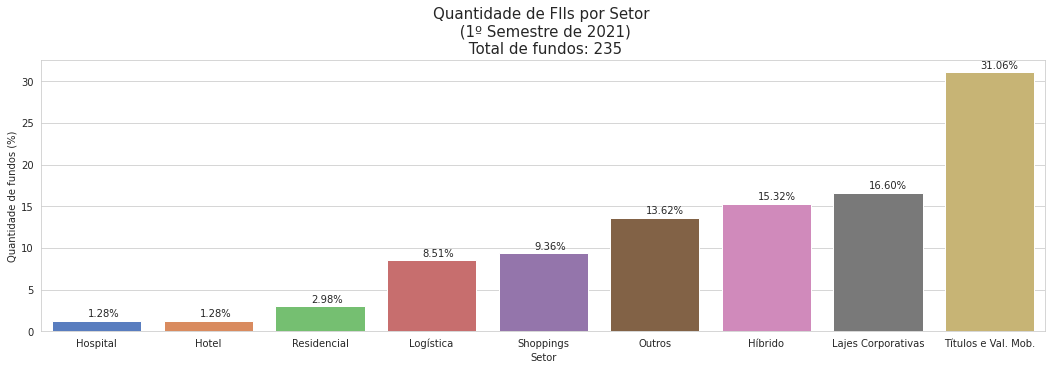

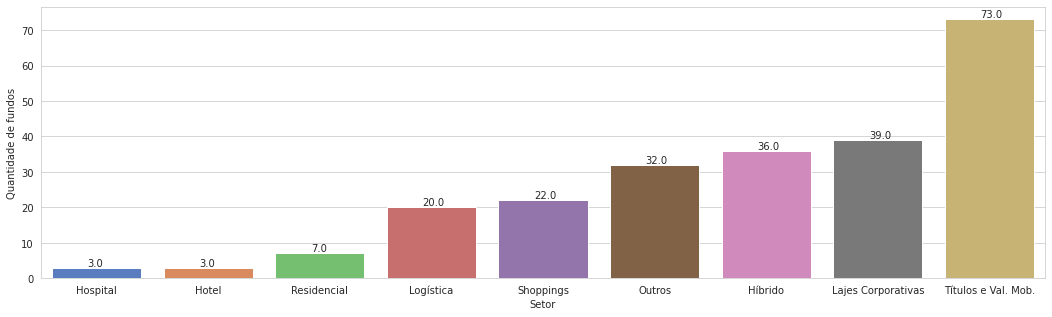

In [47]:
plotar_barra("Quantidade de FIIs por Setor \n (1º Semestre de 2021)" + "\n Total de fundos: " + str(fundos_por_setor[['cod']].count().sum().values[0]),
             "Setor", 
             "Quantidade de fundos (%)",
             fundos_por_setor[['cod']].count().sort_values("cod").index ,
             ((fundos_por_setor[['cod']].count()/fundos_por_setor[['cod']].count().sum())*100).sort_values("cod").cod, 
             fundos_por_setor[['cod']].count().sort_values("cod"),True,2.5,0.5)

plotar_barra("",
             "Setor", 
             "Quantidade de fundos",
             fundos_por_setor[['cod']].count().sort_values("cod").index ,
             fundos_por_setor[['cod']].count().sort_values("cod").cod, 
             fundos_por_setor[['cod']].count().sort_values("cod"),False,2.5,0.5)

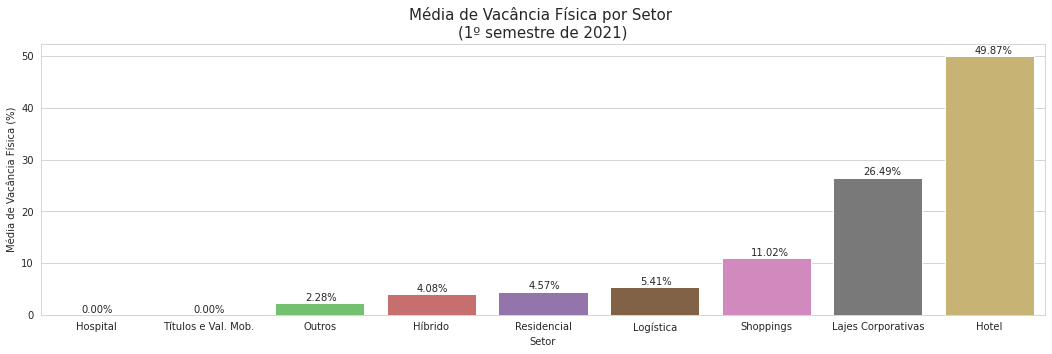

In [48]:
plotar_barra("Média de Vacância Física por Setor \n(1º semestre de 2021)",
             "Setor", 
             "Média de Vacância Física (%)",
             fundos_por_setor[['vacancia_fisica']].mean().sort_values("vacancia_fisica").index,
             fundos_por_setor[['vacancia_fisica']].mean().sort_values("vacancia_fisica").vacancia_fisica, 
             fundos_por_setor[['vacancia_fisica']].mean().sort_values("vacancia_fisica"),True,3,0.5)

In [49]:
## Chama a função para plotar o grafico de dividendos
grafico_dividendos()

### Exportar datasets

In [50]:
df_ranking.to_csv("ranking.csv", sep=';', encoding= "iso-8859-1")
df_fundo_yfinance.to_csv("df_fundo_yfinance.csv", sep=';', encoding= "iso-8859-1")
df_rendimentos.to_csv("df_rendimentos.csv", sep=';', encoding= "iso-8859-1")
df_qtd_dividendo_pago.to_csv("df_qtd_dividendo_pago.csv", sep=';', encoding= "iso-8859-1")
df_fundo_escolhido_por_setor.to_csv("df_fundo_escolhido_por_setor.csv", sep=';', encoding= "iso-8859-1")

## Análise com série temporal com os fundos selecionados

### Tipos de séries temporais

Tendência: Crescimento ou decrescimento ao longo de um período de tempo.
Sazonalidade: Variação repetitiva em função de fatores externo: tempo, férias eleições.

1.   Série estácionaria: Quando a média e a variância são constantes ao longo do tempo, ou seja, quando não há tendência ou sazonalidade no período
2.   Série não estácionaria: Presença de tendências e sazonalidade no período.

Para transformar uma série em série estacionária devemos calcular a diferenciação. Normalmente isso transforma um série não-estacionaria em estacionária.

## Autocorrelação

1.   A correlação é ma medida de quanto duas variáveis estão lenearmente relacionadas
2.   A autocorrelação (ACF) é a medida de quanto duas observações da mesma série temporal setão linearmente relacionadas



**REALIZANDOS TESTES **

### TESTE ADF (test Augmented Dickey-Fuller

É um cálculo estátistico que vai determinar o quão um série temporal pode ser definida pela sua tendência. Ele é um teste de hipótese:


*   Hipótese nula: a série é não-estacionária e é dependente do tempo
*   Hipótese alternativa: a série é estacionária

Então calculamos o valor-p e, caso ele seja abaixo de um limite, rejeitamos a hipótese nula e a série é estacionaria.


## ARIMA

ARUMA é uma crônimo para o AR (autoregressivo), I (integrado) e MA (média móvel), ou seja, é um modelo que une outros dois modelos e uma diferenciação (integrado)

AR(p) O p é quantidade de periodo que queremos utilizar

É uma regrassão linear que utiliza valores do passado para prever o futuro

MA (q) - q - Erros de previsão dos dados passados

É uma regressão linear que utiliza valores dos ERROS das previsões passadas para prever o futuro.

I (d) Representa quantas diferenciações teve qie fazer para que a série se tornasse estacionária.

OBS: Se aumentar muito pode ter uma autocorrelação negativa.


## SARIMA

Porém, também podemos usar o ARIMA para dados com muita sazonalidade. Para isso, devemos usar o modelo ARIMA Sazonal ou SARIMA.:

ARIMA (p,d,q) - termos do ARIMA
SARIMA (P,D,Q)m termos sazonais



## Plotando series temporais

In [51]:
df_rendimentos[df_rendimentos['cod']=='XTED11'].dt_compra

1   2016-06-30
Name: dt_compra, dtype: datetime64[ns]

In [52]:
df_fundo_yfinance_ate_junho = df_fundo_yfinance.query(" Date <= '2021-11-01'")

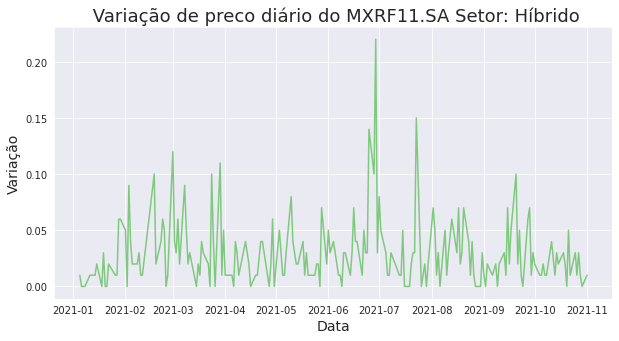

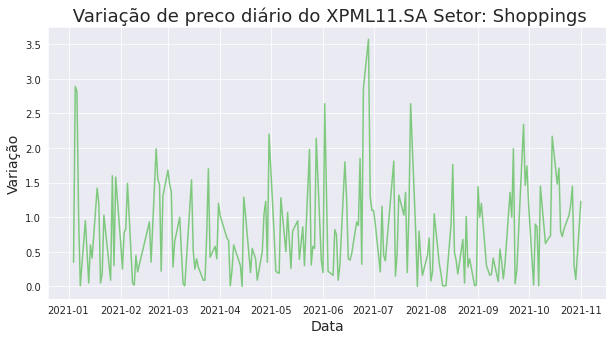

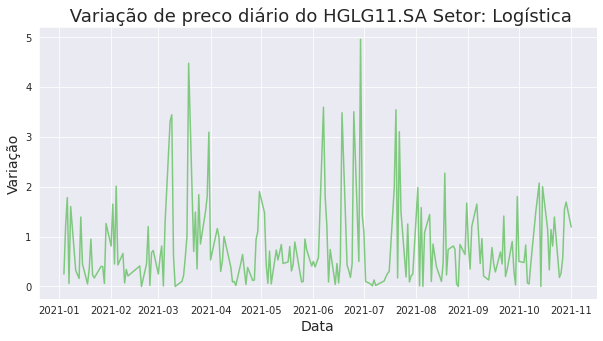

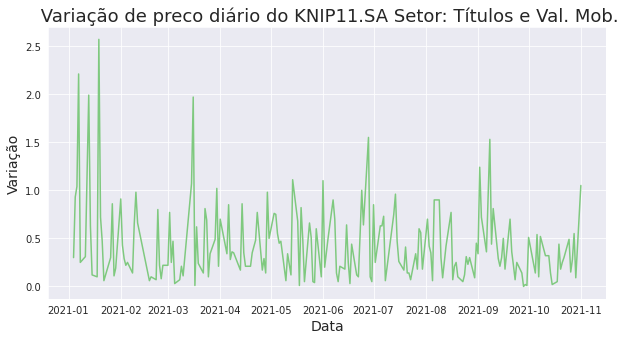

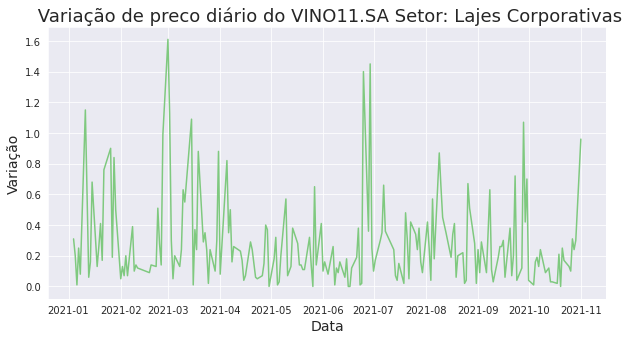

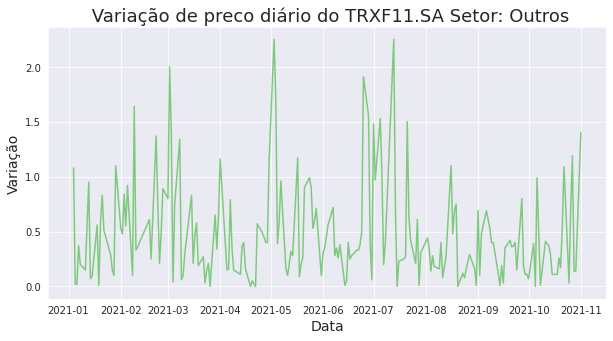

In [53]:
for cod,setor in df_fundo_escolhido_por_setor[['cod','setor']].values:
  cod_original = cod
  cod += '.SA'
  grafico_go(titulo=" Histório de preços - " + cod + "  - Setor: " + setor,
               labelx="Data",
               labely= "Preços",
               dataset=df_fundo_yfinance_ate_junho.loc[cod])
  plotar_variacao(titulo=" Variação de preco diário do " + cod + " Setor: " + setor,
               labelx="Data",
               labely= "Variação",
               x=df_fundo_yfinance_ate_junho.loc[cod].index,
               y =df_fundo_yfinance_ate_junho.loc[cod].variacao_diaria,
               dataset=df_fundo_yfinance_ate_junho.loc[cod])
  plotar_rendimento(titulo=" Histórico de pagamento de dividendo por cota do fundo " + cod + " Setor: " + setor,
               labelx="Data",
               labely= "Valor do dividendo",
               x=df_rendimentos[df_rendimentos['cod']==cod_original].dt_pagamento,
               y =df_rendimentos[df_rendimentos['cod']==cod_original].valor_pago,
               dataset=df_rendimentos[df_rendimentos['cod']==cod_original])
